In [82]:
from __future__ import print_function
import pandas as pd # data analysis
import numpy as np # linear algebra

#import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')




In [83]:
crop = pd.read_csv('/kaggle/input/sihcrop/Crop_recommendation.csv')
crop.head(5)

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [84]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [85]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [86]:
crop['label'].nunique()

22

In [87]:
crop['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

<Axes: xlabel='ph', ylabel='Density'>

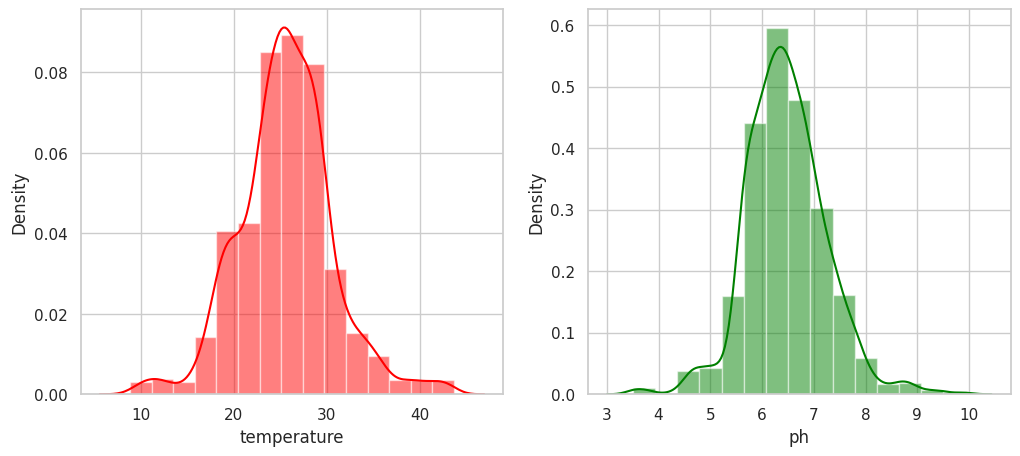

In [88]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(crop['temperature'],color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 2, 2)
sns.distplot(crop['ph'],color="green",bins=15,hist_kws={'alpha':0.5})

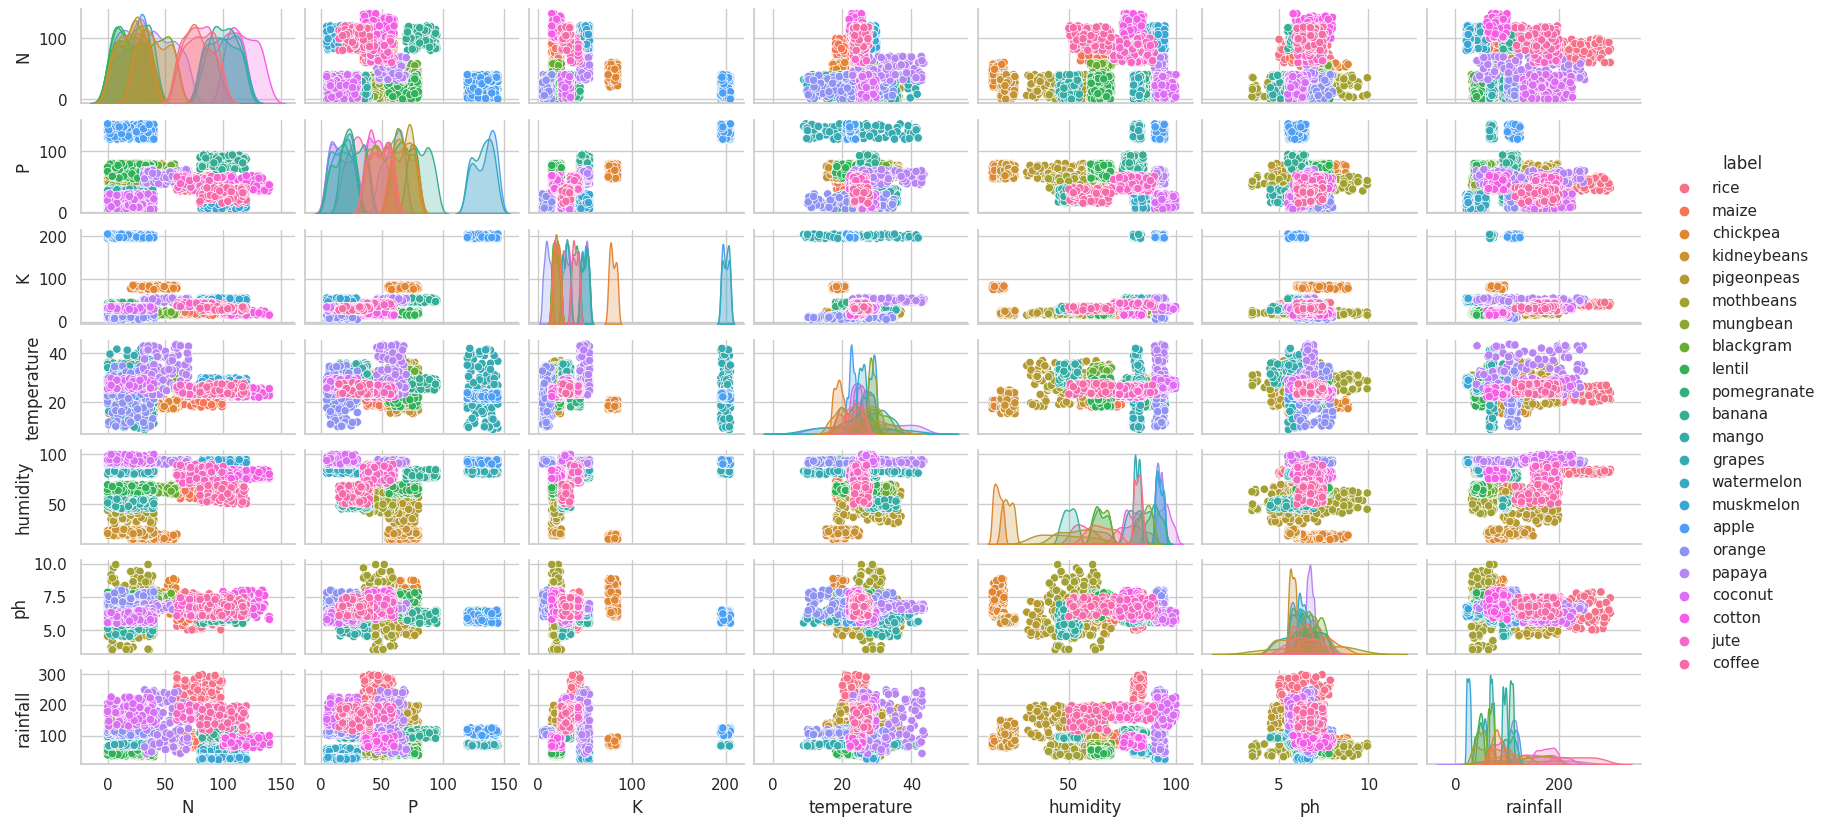

In [89]:
sns.pairplot(crop, hue='label', height=1.2, aspect=2)

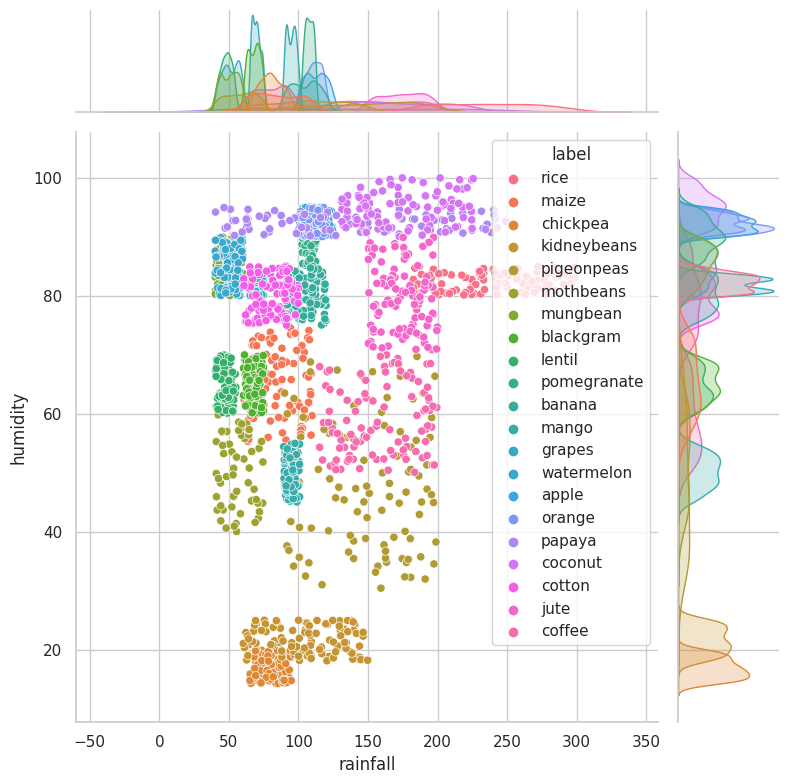

In [90]:
sns.jointplot(x="rainfall",y="humidity",data=crop[(crop['temperature']<40) & 
                                                  (crop['rainfall']>40)],height=8,hue="label")

<Axes: xlabel='label', ylabel='ph'>

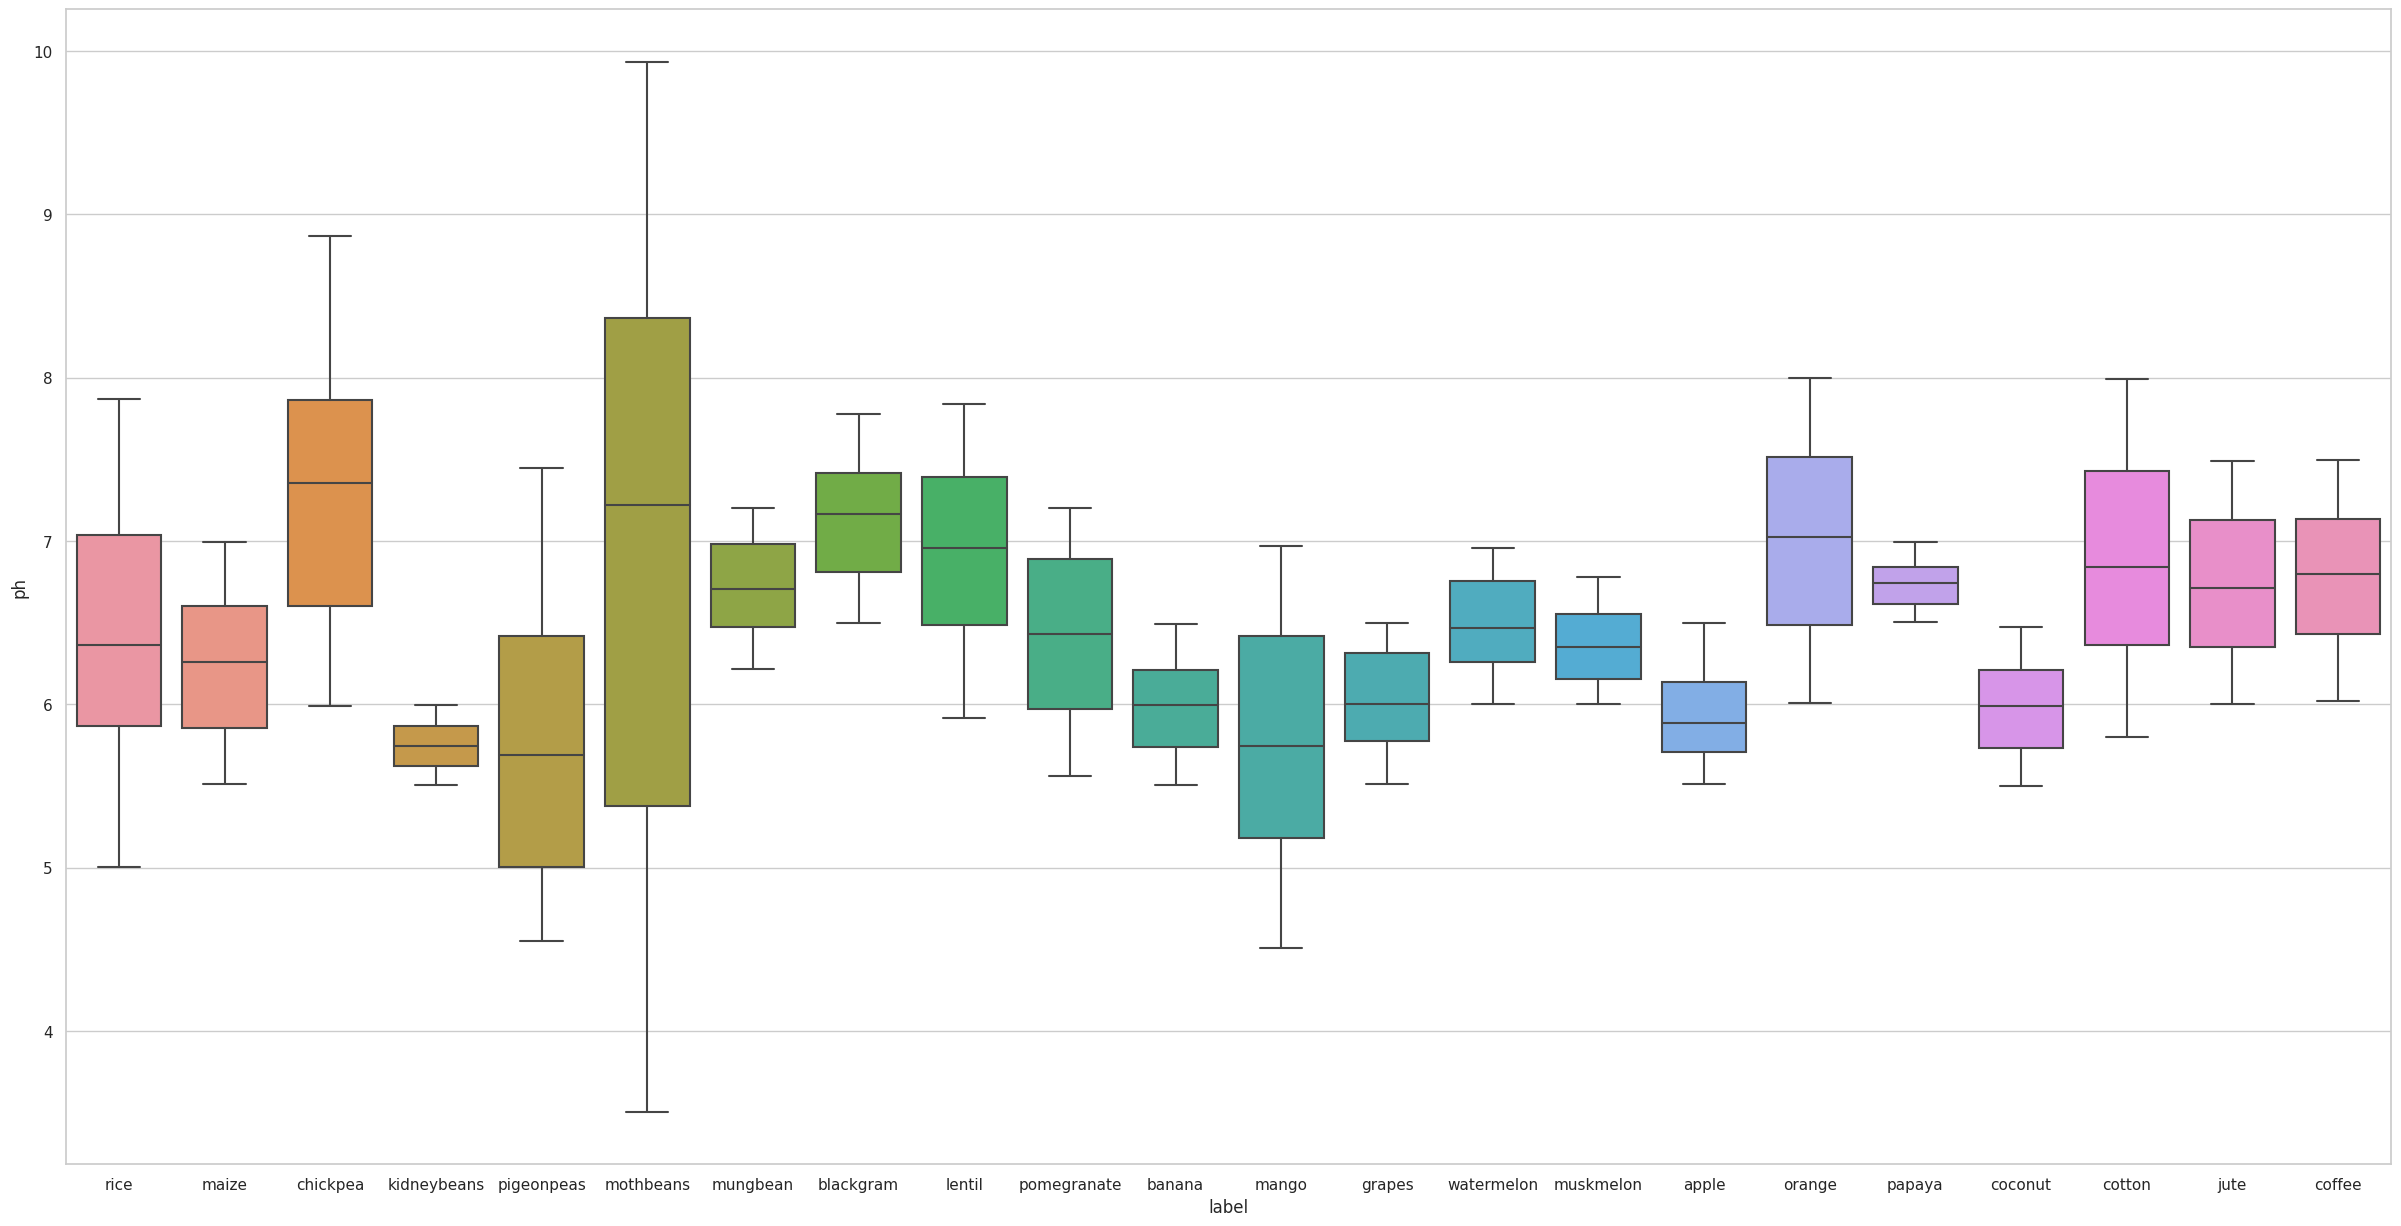

In [91]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='label',y='ph',data=crop)

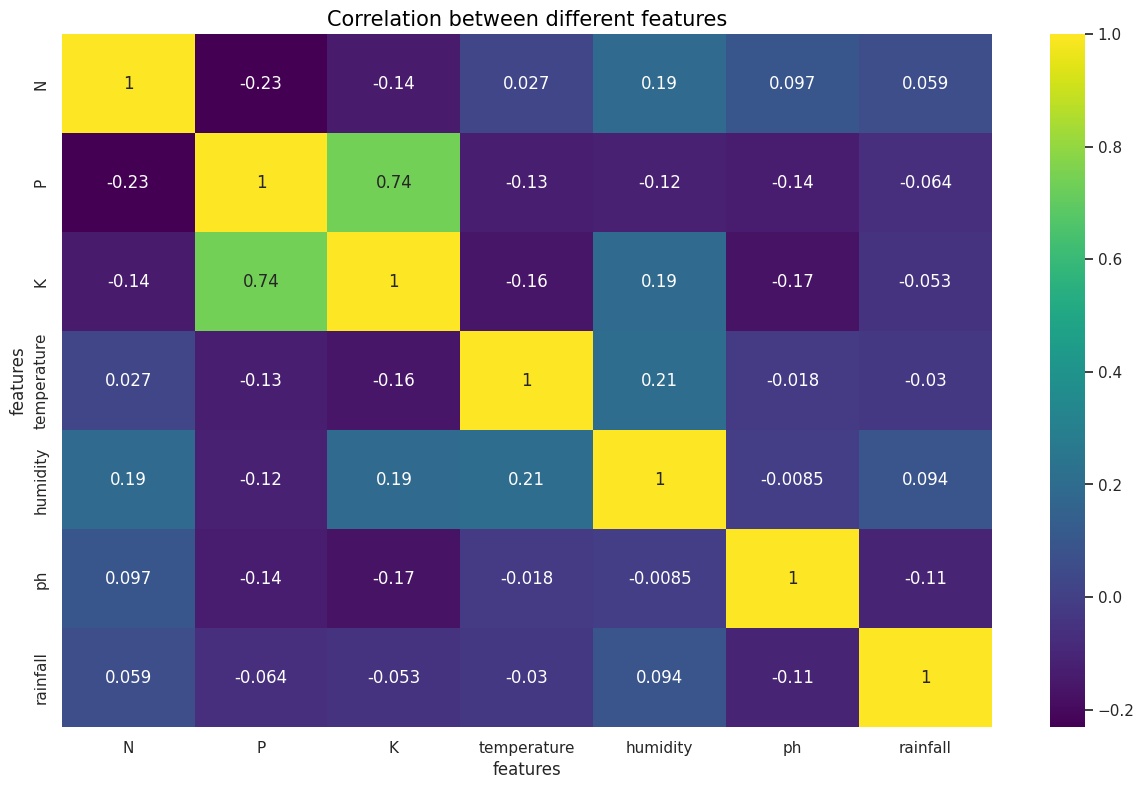

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for the correlation matrix
numeric_crop = crop.select_dtypes(include=['float64', 'int64'])

# Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 9))

# Plot the heatmap with the correlation matrix of numeric columns
sns.heatmap(numeric_crop.corr(), annot=True, cmap='viridis', ax=ax)

# Set labels and title
ax.set(xlabel='features', ylabel='features')
plt.title('Correlation between different features', fontsize=15, c='black')

# Display the plot
plt.show()


In [93]:
crop_summary = pd.pivot_table(crop,index=['label'],aggfunc='mean')
crop_summary.head()

K       N       P   humidity        ph    rainfall  \
label                                                                
apple      199.89   20.80  134.22  92.333383  5.929663  112.654779   
banana      50.05  100.23   82.01  80.358123  5.983893  104.626980   
blackgram   19.24   40.02   67.47  65.118426  7.133952   67.884151   
chickpea    79.92   40.09   67.79  16.860439  7.336957   80.058977   
coconut     30.59   21.98   16.93  94.844272  5.976562  175.686646   

           temperature  
label                   
apple        22.630942  
banana       27.376798  
blackgram    29.973340  
chickpea     18.872847  
coconut      27.409892

In [94]:
import plotly.graph_objects as go
import plotly.io as pio

# Ensure proper rendering in your environment
pio.renderers.default = 'notebook'  # Or 'iframe', 'browser', etc.

# Plotly bar chart code
fig = go.Figure()

fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='mediumvioletred'
))

fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='springgreen'
))

fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='dodgerblue'
))

fig.update_layout(title="N-P-K values comparison between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()


In [95]:
features = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']

In [96]:
acc = []
model = []

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

DECISSION TREE

In [98]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(x_train,y_train)

predicted_values = DT.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [99]:
score = cross_val_score(DT, features, target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]


In [100]:
#Print Train Accuracy
dt_train_accuracy = DT.score(x_train,y_train)
print("Training accuracy = ",DT.score(x_train,y_train))
#Print Test Accuracy
dt_test_accuracy = DT.score(x_test,y_test)
print("Testing accuracy = ",DT.score(x_test,y_test))

Training accuracy =  0.8818181818181818
Testing accuracy =  0.9


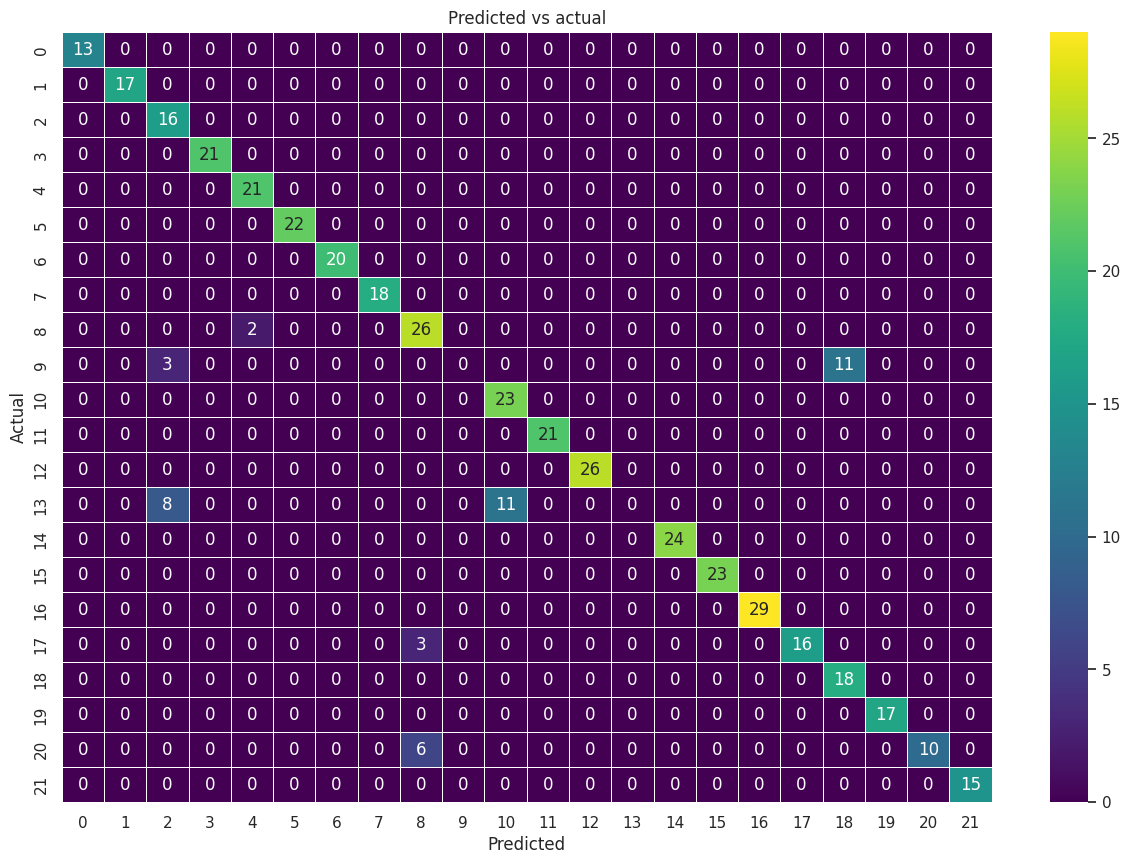

In [101]:
y_pred = DT.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

RANDOM FOREST

In [102]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [103]:
score = cross_val_score(RF,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99772727 0.99318182 0.98863636]


In [104]:
#Print Train Accuracy
rf_train_accuracy = RF.score(x_train,y_train)
print("Training accuracy = ",RF.score(x_train,y_train))
#Print Test Accuracy
rf_test_accuracy = RF.score(x_test,y_test)
print("Testing accuracy = ",RF.score(x_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.990909090909091


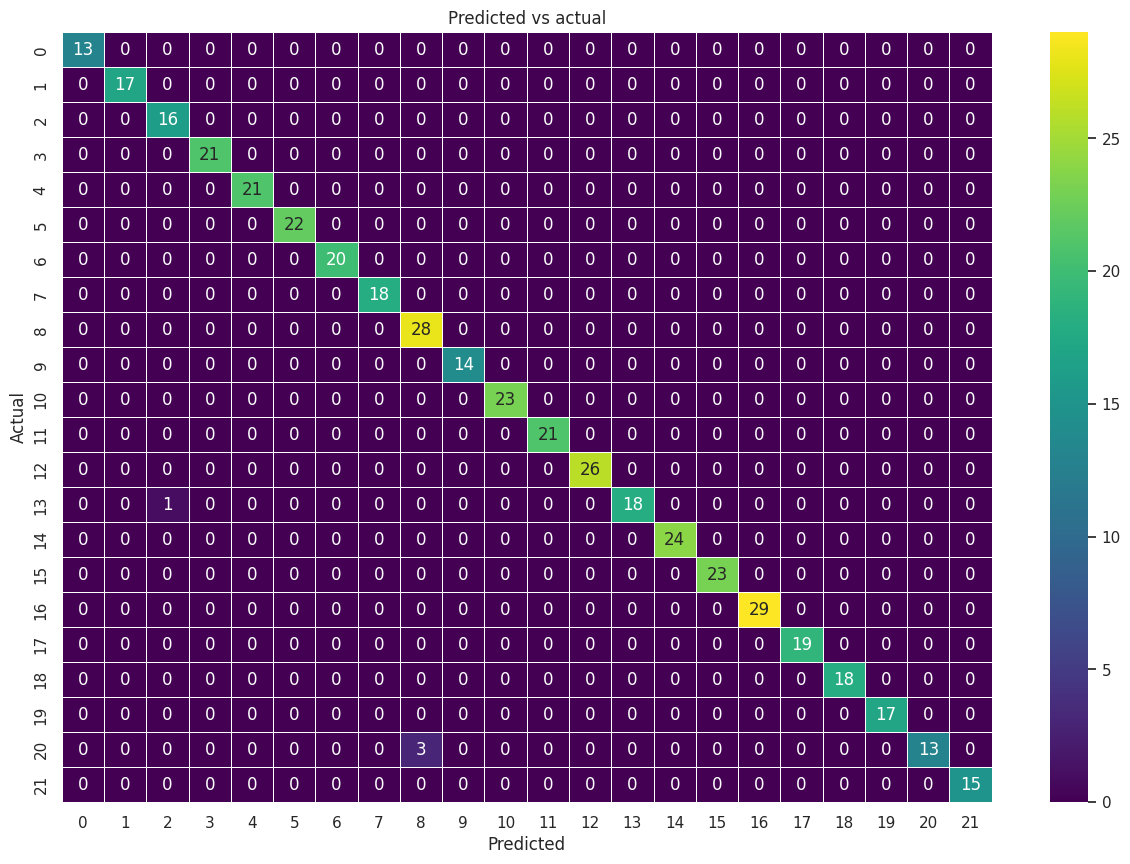

In [105]:
y_pred = RF.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

XG BOOST

In [106]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize and train the XGBoost classifier
XB = xgb.XGBClassifier()
XB.fit(x_train, y_train_encoded)

# Make predictions on the test set
predicted_values_encoded = XB.predict(x_test)
predicted_values = label_encoder.inverse_transform(predicted_values_encoded)

# Make predictions on the training set
train_predictions_encoded = XB.predict(x_train)
train_predictions = label_encoder.inverse_transform(train_predictions_encoded)

# Calculate accuracies
XB_test_accuracy = accuracy_score(y_test, predicted_values)
XB_train_accuracy = accuracy_score(y_train, train_predictions)

# Append accuracies to the lists
acc.append(XB_test_accuracy)
model.append('XGBoost')

print("XGBoost Test Accuracy is: ", XB_test_accuracy)
print("XGBoost Train Accuracy is: ", XB_train_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, predicted_values))


XGBoost Test Accuracy is:  0.990909090909091
XGBoost Train Accuracy is:  1.0
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      0.96      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00  

In [107]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

# Encode the target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Initialize the XGBoost classifier
XB = xgb.XGBClassifier()

# Perform cross-validation
score = cross_val_score(XB, features, target_encoded, cv=5)

# Print cross-validation scores and their mean
print('Cross-validation scores:', score)
print('Mean cross-validation score:', score.mean())


Cross-validation scores: [0.99545455 0.98863636 0.99545455 0.99545455 0.98863636]
Mean cross-validation score: 0.9927272727272728


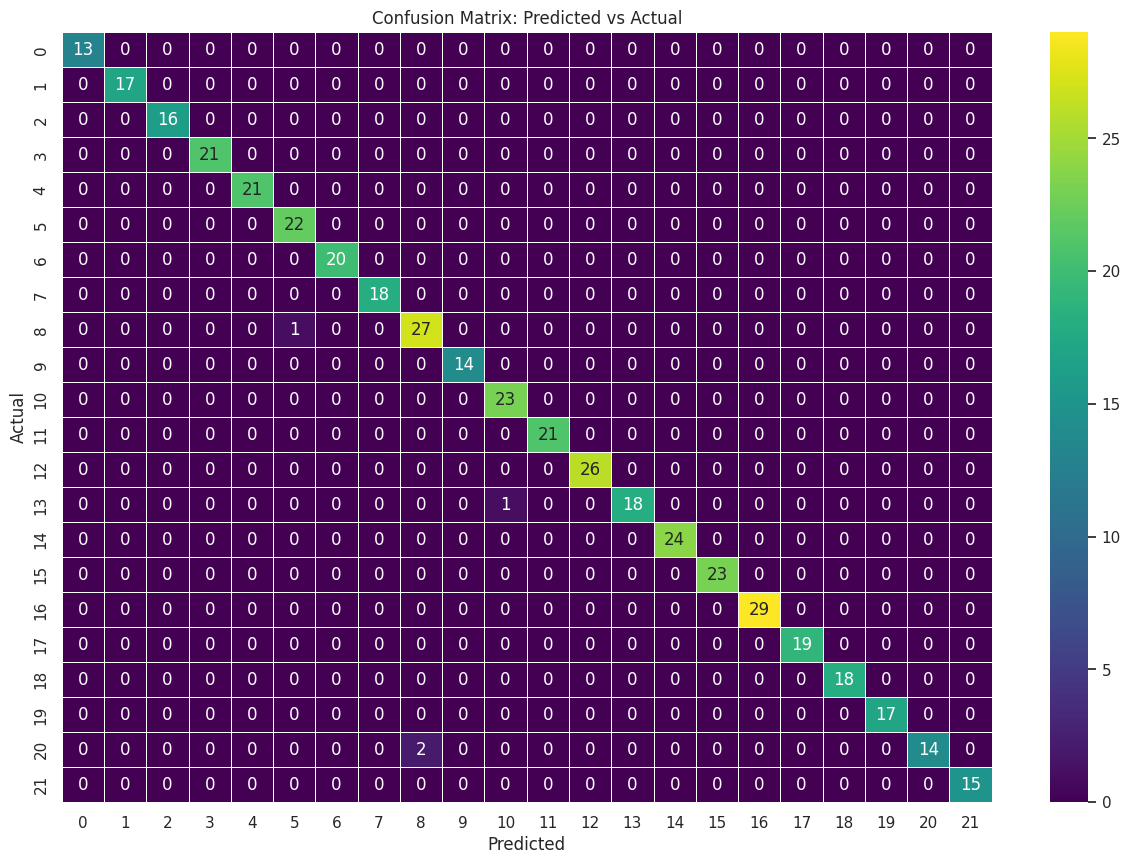

In [112]:


# Encode the target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Split the data
x_train, x_test, y_train_encoded, y_test_encoded = train_test_split(features, target_encoded, test_size=0.2, random_state=2)

# Initialize and train the XGBoost classifier
XB = xgb.XGBClassifier()
XB.fit(x_train, y_train_encoded)

# Make predictions
y_pred_encoded = XB.predict(x_test)

# Decode predictions to match y_test
y_pred_decoded = label_encoder.inverse_transform(y_pred_encoded)
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)

# Compute confusion matrix
cm = confusion_matrix(y_test_decoded, y_pred_decoded)

# Plot confusion matrix
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix: Predicted vs Actual')
plt.show()


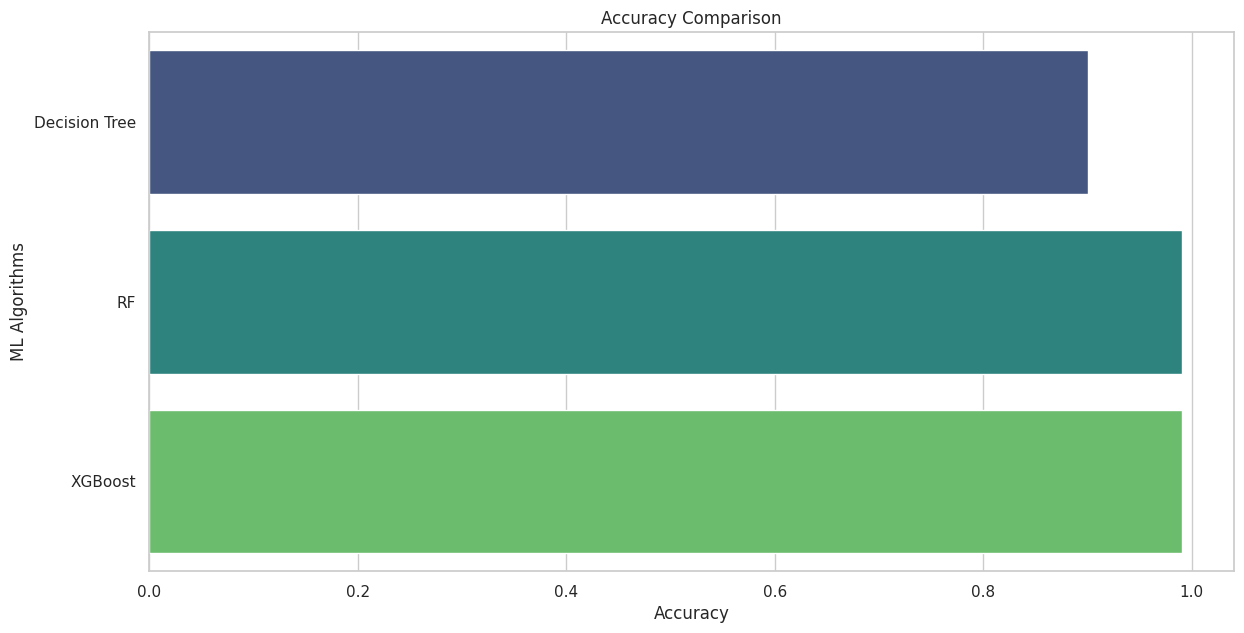

In [113]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

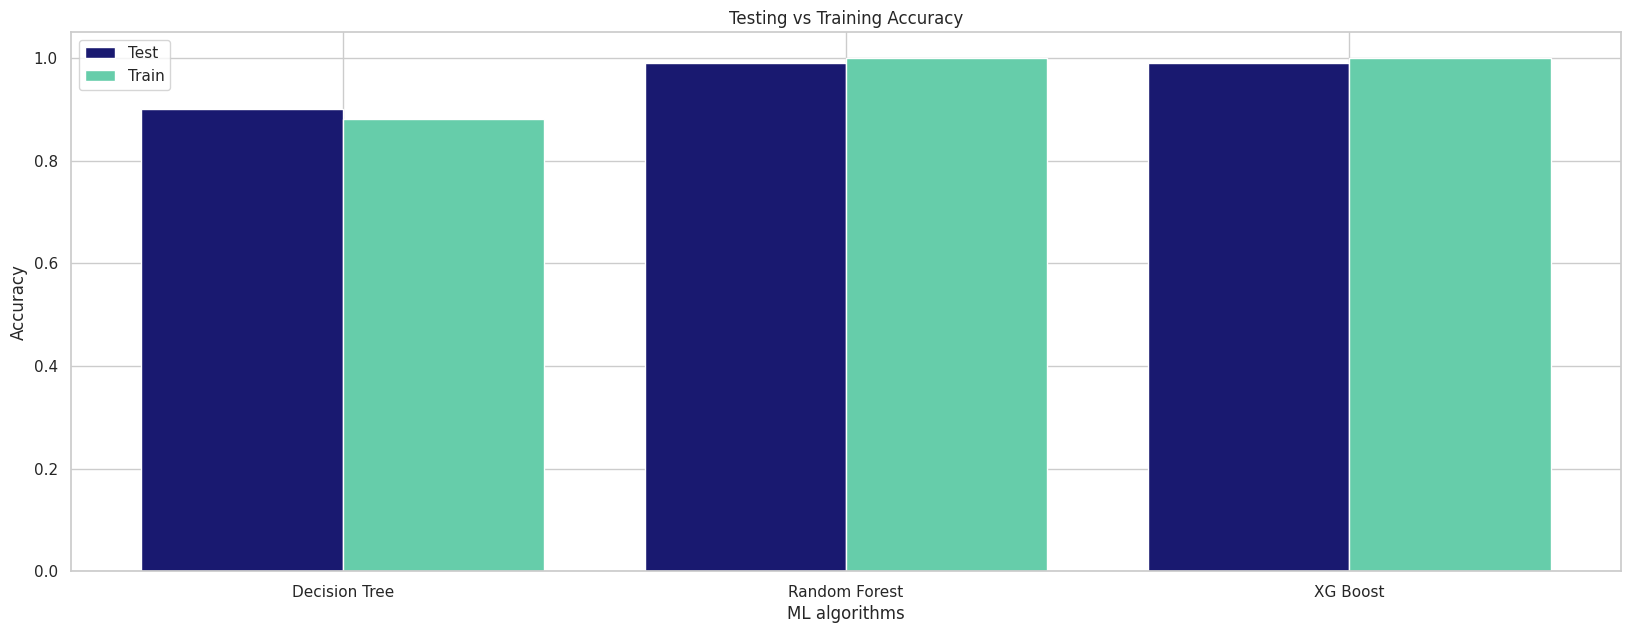

In [114]:
label = ['Decision Tree','Random Forest','XG Boost']
Test = [ dt_test_accuracy,rf_test_accuracy,
         XB_test_accuracy]
Train = [ dt_train_accuracy, rf_train_accuracy,
          XB_train_accuracy]

f, ax = plt.subplots(figsize=(20,7)) # set the size that you'd like (width, height)
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
#plt.savefig('train vs test.png')
plt.show()

In [120]:
import joblib
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform target labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize and train the XGBoost classifier
XB = xgb.XGBClassifier()
XB.fit(x_train, y_train_encoded)

# Save the trained model and the label encoder
joblib.dump(XB, 'xgboost_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

# Load the model and label encoder from the file
loaded_model = joblib.load('xgboost_model.pkl')
loaded_encoder = joblib.load('label_encoder.pkl')

# Example of using the loaded model and encoder
# Transform new data using the loaded encoder
# y_pred_encoded = loaded_model.predict(x_test)
# y_pred = loaded_encoder.inverse_transform(y_pred_encoded)


In [122]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import numpy as np
import joblib

# Load the trained XGBoost model and LabelEncoder
model = xgb.Booster()
model.load_model(r"F:\MLPROJECTS\SIH\xgboost_model.json")  # Load the model
label_encoder = joblib.load(r"F:\MLPROJECTS\SIH\label_encoder.pkl")  # Load label encoder

# Streamlit app title and input form
st.title("Crop Recommendation System")
st.write("Provide the following inputs to get crop recommendations")

# Create input sliders for the crop features
nitrogen = st.slider('Nitrogen', 0, 100)
phosphorus = st.slider('Phosphorus', 0, 100)
potassium = st.slider('Potassium', 0, 100)
temperature = st.slider('Temperature (C)', 0, 50)
humidity = st.slider('Humidity (%)', 0, 100)
ph = st.slider('pH', 0.0, 14.0)
rainfall = st.slider('Rainfall (mm)', 0, 500)

# Prepare input data as a pandas DataFrame
input_data = pd.DataFrame({
    'N': [nitrogen],
    'P': [phosphorus],
    'K': [potassium],
    'temperature': [temperature],
    'humidity': [humidity],
    'ph': [ph],
    'rainfall': [rainfall]
})

# Prediction function to get the top 5 crops
def predict_top_crops(input_data, model, label_encoder):
    dmatrix = xgb.DMatrix(input_data)  # Convert input data to DMatrix for XGBoost
    preds = model.predict(dmatrix)  # Predict using the model
    
    # If preds has more than one dimension, handle it properly
    if preds.ndim > 1:
        preds = preds[0]
    
    # Get indices of top 5 predictions (sorted by highest probabilities)
    top_5_indices = np.argsort(preds)[::-1][:5]  # Get top 5 predictions
    top_5_crops = label_encoder.inverse_transform(top_5_indices)  # Decode crop names
    top_5_scores = preds[top_5_indices]  # Get prediction scores for the top 5
    
    return top_5_crops, top_5_scores

# When the user clicks the Predict button
if st.button('Predict Best Crops'):
    top_crops, top_scores = predict_top_crops(input_data, model, label_encoder)
    st.write("Top 5 Best-Suited Crops: ", top_crops)

    # Plot the top 5 crops and their prediction scores
    st.write("Crop Prediction Results")
    fig, ax = plt.subplots()
    sns.barplot(x=top_crops, y=top_scores, ax=ax)
    ax.set_title("Top 5 Crop Recommendations")
    ax.set_ylabel('Prediction Score')
    ax.set_xlabel('Crops')
    st.pyplot(fig)


Please enter the following soil and environmental conditions:


Enter Nitrogen Content (in %):  34
Enter Phosphorus Content (in %):  32
Enter Potassium Content (in %):  24
Enter Temperature (in °C):  40
Enter Humidity (in %):  43
Enter Soil pH level:  6
Enter Rainfall (in mm):  700



Based on the provided data, the top 5 best-suited crops are:
1. mango
2. rice
3. pigeonpeas
4. coffee
5. mothbeans
